<a href="https://colab.research.google.com/github/veerendar2888/ML/blob/master/Bayesian_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bayesian Classification

naive Bayes classifier to understand is Gaussian naive Bayes. In
this classifier, the assumption is that data from each label is drawn from a simple Gaus‐
sian distribution.

In [0]:
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

%matplotlib inline

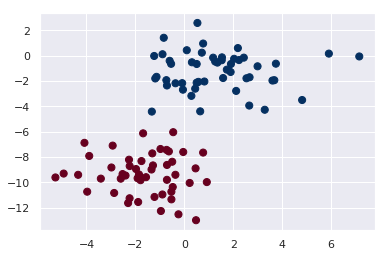

In [5]:
from sklearn.datasets import make_blobs
X,y = make_blobs(100,2,centers=2,random_state=2,cluster_std = 1.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu')

In [6]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# lets generate some new data ans predict the lable
rng = np.random.RandomState(0)
Xnew = [-6,-14] + [14,18]* rng.rand(2000,2)
ynew = model.predict(Xnew)

(-5.902170524311957, 7.789182875858786, -13.793829460308247, 3.381339464828492)

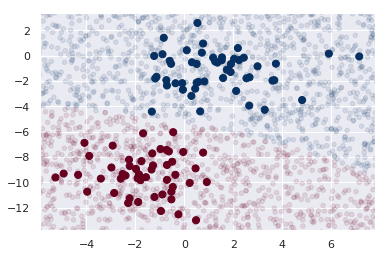

In [11]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:,0],Xnew[:,1],c=ynew,s=20,cmap='RdBu',alpha=0.1)
plt.axis(lim)

In [12]:
type(Xnew)

numpy.ndarray

In [13]:
Xnew.shape

(2000, 2)

In [16]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [0]:
#the final classification will only be as good as the model assumptions that
#lead to it, which is why Gaussian naive Bayes often does not produce very good
#results. Still, in many cases—especially as the number of features becomes large—this
#assumption is not detrimental enough to prevent Gaussian naive Bayes from being a
#useful method.

In [0]:
# Multinomial Naive Bayes

The Gaussian assumption just described is by no means the only simple assumption
that could be used to specify the generative distribution for each label. Another useful
example is multinomial naive Bayes, where the features are assumed to be generated
from a simple multinomial distribution. The multinomial distribution describes the
probability of observing counts among a number of categories, and thus multinomial
naive Bayes is most appropriate for features that represent counts or count rates.
The idea is precisely the same as before, except that instead of modeling the data dis‐
tribution with the best-fit Gaussian, we model the data distribution with a best-fit
multinomial distribution.

In [19]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [0]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space',
              'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [21]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [0]:
model = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [0]:
model.fit(train.data,train.target)
labels = model.predict(test.data)

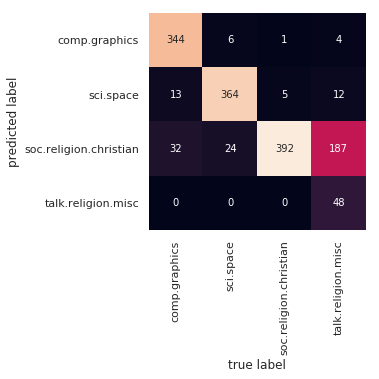

In [25]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');